<a href="https://colab.research.google.com/github/ActiveStacks/NLP/blob/main/XSSVulnerabilities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import nltk
nltk.download('stopwords')
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from tensorflow.keras import models, layers
# import warnings
# warnings.filterwarnings('ignore')


from sklearn.metrics import confusion_matrix
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import classification_report




Mounted at /content/drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:




path = ('/content/drive/MyDrive/CVEs.csv')
# path = ('/content/drive/MyDrive/XSS_dataset.csv')
df = pd.read_csv(path)

In [ ]:
print(df)

                                                    code language      safety
0      package org.bouncycastle.jcajce.provider.asymm...     java  vulnerable
1      <?php\n\n\n\n/**\n\n * ownCloud - user_ldap\n\...      php  vulnerable
2      #!/usr/bin/env python\n\nfrom __future__ impor...       py        safe
3      /* -*- c-basic-offset: 8 -*-\n\n   rdesktop: A...        c        safe
4      <!DOCTYPE html>\n\n<html>\n\n    <head>\n\n   ...     html        safe
...                                                  ...      ...         ...
31189  /*\n\n * Copyright 2002-2012 the original auth...     java        safe
31190                                     404: Not Found      tpl  vulnerable
31191  <?php\n\n/* vim: set expandtab sw=4 ts=4 sts=4...    Other        safe
31192  /*\n\n * Glue code for the SHA1 Secure Hash Al...        c  vulnerable
31193  <?php\n\n/*\n\n +-----------------------------...      php  vulnerable

[31194 rows x 3 columns]


In [ ]:
X = df['code']
y = df['safety']

In [ ]:
print(df['code'])

0        package org.bouncycastle.jcajce.provider.asymm...
1        <?php\n\n\n\n/**\n\n * ownCloud - user_ldap\n\...
2        #!/usr/bin/env python\n\nfrom __future__ impor...
3        /* -*- c-basic-offset: 8 -*-\n\n   rdesktop: A...
4        <!DOCTYPE html>\n\n<html>\n\n    <head>\n\n   ...
                               ...                        
31189    /*\n\n * Copyright 2002-2012 the original auth...
31190                                       404: Not Found
31191    <?php\n\n/* vim: set expandtab sw=4 ts=4 sts=4...
31192    /*\n\n * Glue code for the SHA1 Secure Hash Al...
31193    <?php\n\n/*\n\n +-----------------------------...
Name: code, Length: 31194, dtype: object


In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
vectorsTf = TfidfVectorizer()


In [ ]:
X_vect = vectorsTf.fit_transform((X).values.astype('U'))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size = 0.2, random_state= 1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10948, 5640)
(2738, 5640)
(10948,)
(2738,)


In [ ]:
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
9224     1
10862    1
11146    1
4920     1
4369     1
        ..
905      1
5192     1
12172    1
235      1
13349    1
Name: Label, Length: 10948, dtype: int64
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
4003     0
10444    1
12001    0
5440     1
6034     0
        ..
5142     1
8104     0
1123     1
3625     1
2784     1
Name: Label, Length: 2738, dtype: int64


Accuracy of Logistic Regression on test set : 0.9985390796201608
F1 Score of Logistic Regression on test set : 0.9986101459346769
......................RESULTS.................................................
PREDICTIONS:  [0 1 0 ... 1 1 1]
.....................CLASSIFICATION SCORE.....................................
Classification Score:  0.9985390796201608
.....................CONFUSION MATRIX.........................................
[[1297    1]
 [   3 1437]]


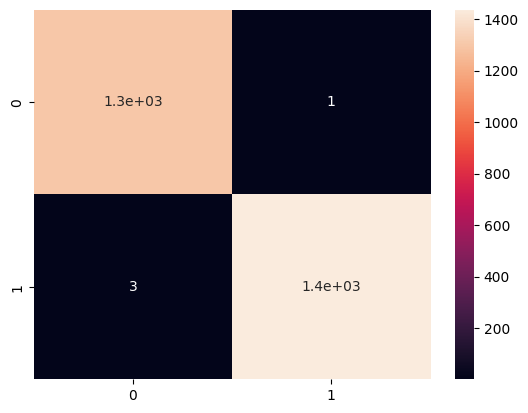

In [ ]:
# IMPORT SOME RELEVANT CLASSIFIERS
log_res = LogisticRegression()
model = log_res.fit(X_train, y_train)
y_predict = model.predict(X_test)
print(f"Accuracy of Logistic Regression on test set : {accuracy_score(y_predict, y_test)}")
print(f"F1 Score of Logistic Regression on test set : {f1_score(y_predict, y_test)}")



print("......................RESULTS.................................................")
print("PREDICTIONS: ", y_predict)

# target_group = { '1', '0'}
# print(" ")
# print("......................CLASSIFICATION REPORT...................................")
# print(classification_report(y_test, y_predict, target_names = target_group))

print(".....................CLASSIFICATION SCORE.....................................")
scores = model.score(X_test, y_test)
print("Classification Score: ", scores)

print(".....................CONFUSION MATRIX.........................................")
matrix_confusion = confusion_matrix(y_test, y_predict)
sns.heatmap(matrix_confusion, annot = True)
print(matrix_confusion)






# TP = confusion(1, 1)
# TN = confusion(0, 0)
# FP = confusion(0, 1)
# FN = confusion(1, 0)

# recall = TP/float(TP + FN)
# precision = TP/float(TP + FP)
# print ("Recall: ", recall)
# print("Precision: ", precision)
